**QUANTUM STATES**

**BASIC QUANTUM STATES**

States in quantum computing are vectors of the complex space $\mathbf{H}^n = \mathbb{C}^{2^n}$ of dimension $2^n$, being $n$ the number of qubits. Then, in standard notation, the elements $a$ in $\mathbf{H}^n$ are complex column vectors of dimension or length $2^n$.

$$\begin{bmatrix}
a_0
\\a_1 
\\...
\\ a_{2^n-1}
\end{bmatrix}, a_j \in \mathbb{C} $$

This can be expresed as $\sum_{j}a_j\mathbf{u}_j$ where $\mathbf{u}_j$ are the standard bases. 

In the Dirac notation, instead of $\mathbf{u}_j$ we write $\left|j\right\rangle$, where we express $j$ in binary or decimal form for the standard basis, here called the computational basis. 
$\left \langle j\right|$ is the row vector conjugate of $\left|j\right\rangle$. These bases correspond to physical states as in classical bits, so the system is in a superposition of physical states.


For example, for two qubits, $n=2$, 

$\mathbf{a}=a_{00}\left|00\right\rangle+a_{01}\left|01\right\rangle+a_{10}\left|10\right\rangle+a_{11}\left|11\right\rangle$

Then, as stated in Nielsen et al, “Associated to any isolated physical system is a **complex vector space** with inner product (i.e. a Hilbert space) known as the state space of the system. The system is completely described by its state vector, which is a unit vector in the system’s state space.”

**Qiskit** 

Is an open-source software development kit (SDK) for working with quantum computers at the level of circuits, pulses, and algorithms. Qiskit is made up of elements that work together to enable quantum computing. **Qiskit Terra** provides tools to create quantum circuits at or close to the level of quantum machine code. The element **Aer** provides high-performance quantum computing simulators with realistic noise models. The element **Ignis** provides tools for quantum hardware verification, noise characterization, and error correction. The element **Aqua** provided a library of cross-domain algorithms upon which domain-specific applications can be built.

In [ ]:
!pip install qiskit

In [ ]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

**Quantum states in Qiskit**

After installing Qiskit and importing the relevant packages, we creat a quantum circuit of two qubits, we initialize the circuit with a state that is a superposition of all the bases and we perform a simulation.

In [ ]:
qc = QuantumCircuit(2)  # Create a quantum circuit with two qubit
initial_state = [1/2,1/2,1/2,1/2]   # Define initial_state
qc.initialize(initial_state, qc.qubits) # Apply initialisation operation to the qubits
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

Then we see the result of our simulation, the statevector and an histogram of the measurement.

In [ ]:
#We see the statevector
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


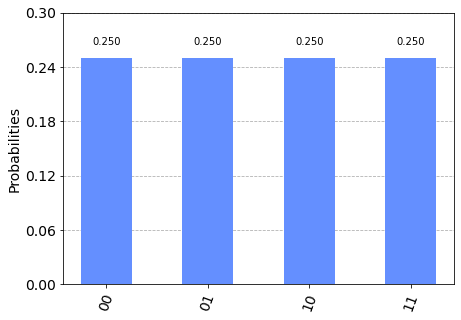

In [ ]:
#We measure our qubits and see the result
qc.measure_all()
qc.draw()
counts = result.get_counts()
plot_histogram(counts)

**Inner product, unit vectors and orthogonal vectors**

$\left\langle w|v\right\rangle$ is the inner product between vectors $w$ and $v$. If $\left\langle w|v\right\rangle=0$ we say that $w$ and $v$ are orthogonal. Note that $\left\langle v|v\right\rangle=|v|^2=|a_0|^2+|a_1|^2+...+|a_{2^n-1}|^2$ is the norm squared of $v$. In quantum computing, the states are unit vectors with $\left\langle v|v\right\rangle=1$ or $|a_0|^2+|a_1|^2+...+|a_{2^n-1}|^2=1$.

**Composite systems**

The state space of a composite physical system is the tensor product of the state spaces of the component physical systems. Given systems 1 to n, $\left|\Psi_1\right\rangle\left|\Psi_2\right\rangle...\left|\Psi_n\right\rangle$, the joint state is $\left|\Psi_1\right\rangle\otimes \left|\Psi_2\right\rangle \otimes\left|\Psi_n\right\rangle$.

For example $\left|\Psi_1\right\rangle=a\left|0\right\rangle+b\left|1\right\rangle$ and $\left|\Psi_2\right\rangle=c\left|0\right\rangle+d\left|1\right\rangle$ then $\left|\Psi_1\right\rangle\otimes\left|\Psi_2\right\rangle=ac\left|00\right\rangle+ad\left|01\right\rangle+bc\left|10\right\rangle+bd\left|11\right\rangle$.

Vectors of the form $\left|\Psi_1\right\rangle\otimes \left|\Psi_2\right\rangle \otimes\left|\Psi_n\right\rangle$ for $\left|\Psi_i\right\rangle \in \mathbf{H}^1$ are decomposable or composite, for example the basis $\left|00\right\rangle \left|01\right\rangle\left|10\right\rangle\left|11\right\rangle$. In general, vectors in $\mathbf{H}^n$ are not decomposable or **entangled** as $\frac{1}{\sqrt{2}}\left|00\right\rangle+\frac{1}{\sqrt{2}}\left|11\right\rangle$

**Block sphere representation**

If we have a one qubit system $|\Psi⟩=a|0⟩+b|1⟩$

Since global phases aren't physically important, we can take $a$ to be real and represent the phase factor in $b$ by $e^{i\phi}$. Normalization requires $a^2+b^2=1$, which we can enforce by setting $a=\cos\theta/2$ and $a=\sin\theta/2$. (Use $\theta/2$ so it yields one-to-one correspondence between a choice of $\theta$, $\phi \ mod 2\pi$ and the state. Then, we have:

$|\Psi⟩=\cos\theta/2|0⟩+e^{i\phi}\sin\theta/2|1⟩$



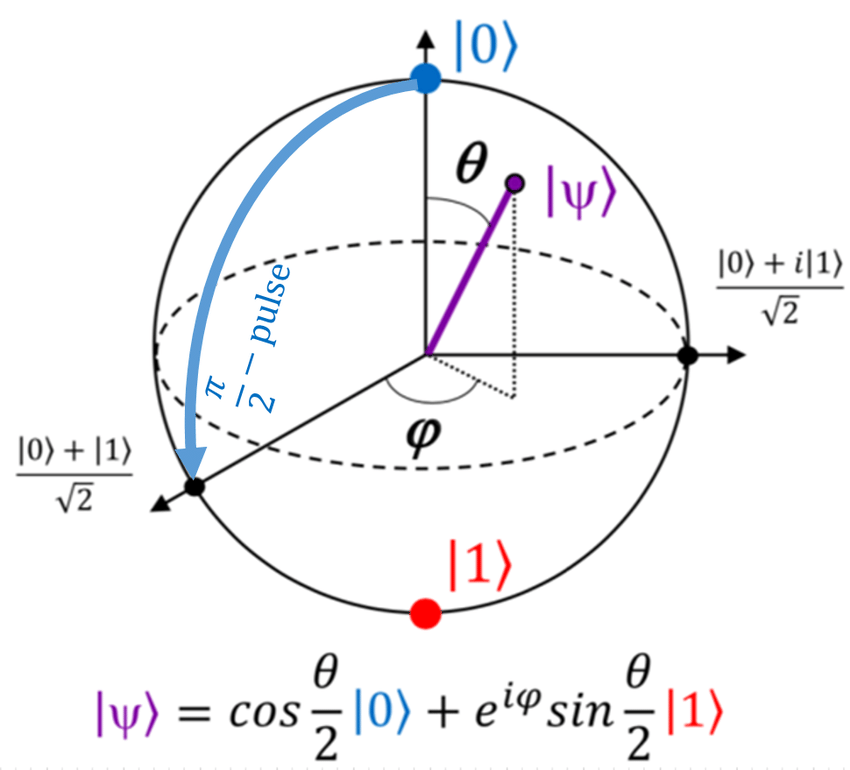
<div>
<img src="attachment:Screenshot.png" width="100"/>
</div>


https://www.researchgate.net/publication/335028508_A_Review_on_Quantum_Computing_Qubits_Cryogenic_Electronics_and_Cryogenic_MOSFET_Physics

**Vector ordering in Qiskit**

Within the physics community, the qubits of a multi-qubit systems are typically ordered with the first qubit on the left-most side of the tensor product and the last qubit on the right-most side. For instance, if the first qubit is in state |0⟩ and second is in state |1⟩, their joint state would be |01⟩. In Qiskit the qubits are represented from the most significant bit on the left to the least significant bit on the right (big-endian). For the example just given, the joint state would be represented as |10⟩.

A common multi-qubit gate involves the application of a gate to one qubit, conditioned on the state of another qubit and then is important to know which qubit is the control and which qubit is the target.

